### __Task 2 - Stock Market Prediction & Forecasting__

##### _Author: Muhammad Taimoor Khan_

#### __1. Importing Libraries__

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM

%matplotlib inline

#### __2. Loading & Reading DataSet__

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df.head() #displaying the first five rows of the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.tail() #displaying the last five rows of the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


#### __3. Getting the Information About the Dataset__

In [4]:
df.shape

(2035, 8)

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

#### __4. Cleaning The Data & PreProcessing It__

In [8]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

<code> There are no null values in the dataset. </code>

In [9]:
#checking for duplicate values
duplicate = df.duplicated()
duplicate.value_counts()

False    2035
Name: count, dtype: int64

<code> There are no duplicate values in the dataset. </code>

In [10]:
#viewing the statistical description of the dataset
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


<Axes: >

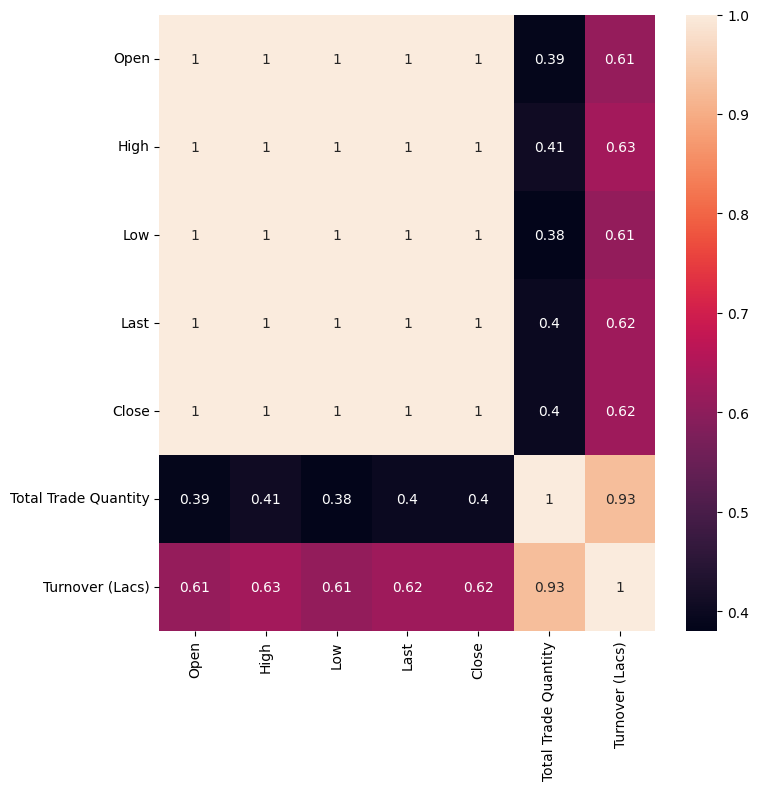

In [11]:
newdf = df.drop(['Date'],axis=1) #dropping the "Date" column as it is a string.
plt.figure(figsize=(8,8))
sns.heatmap(newdf.corr(), annot=True)

<Axes: >

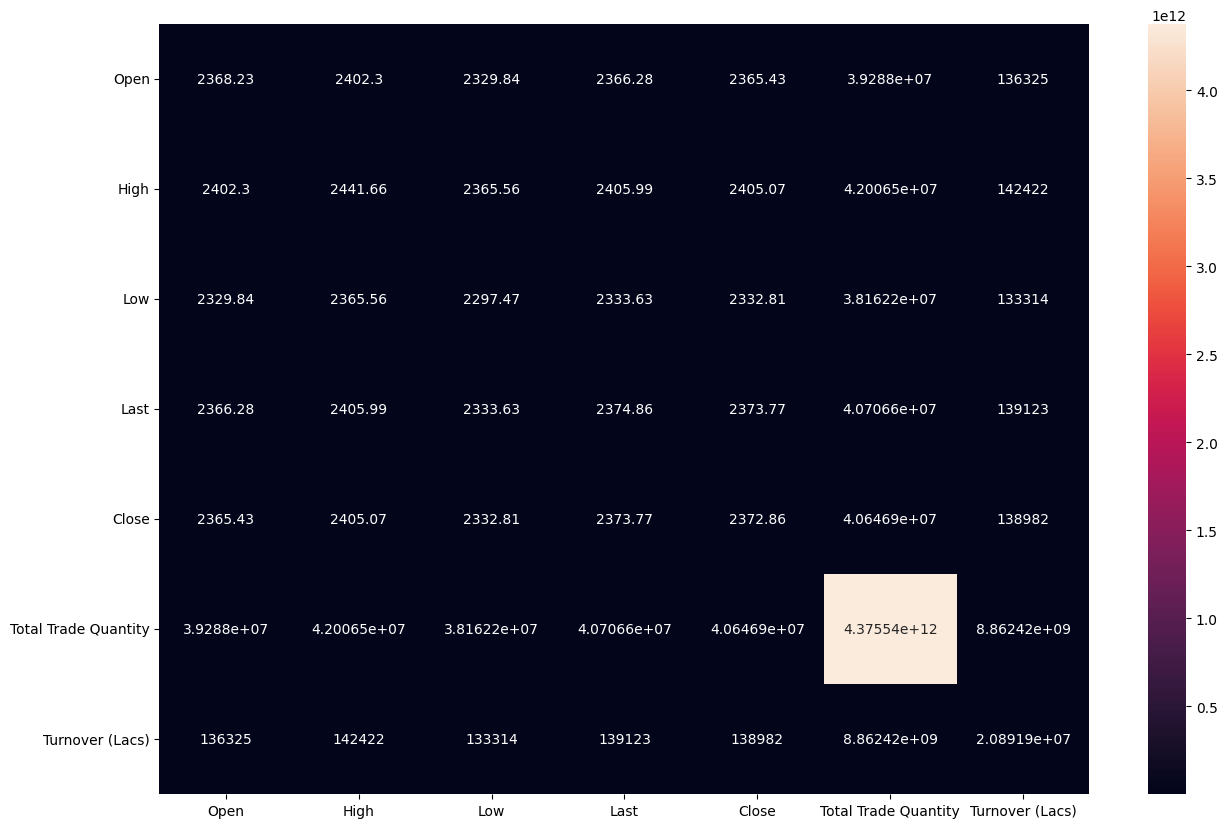

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(newdf.cov(), annot=True, fmt='g')

#### __5. Data Visualization__ 

##### _Plotting Graphs for Open, Close, High, Low, and Last Price_

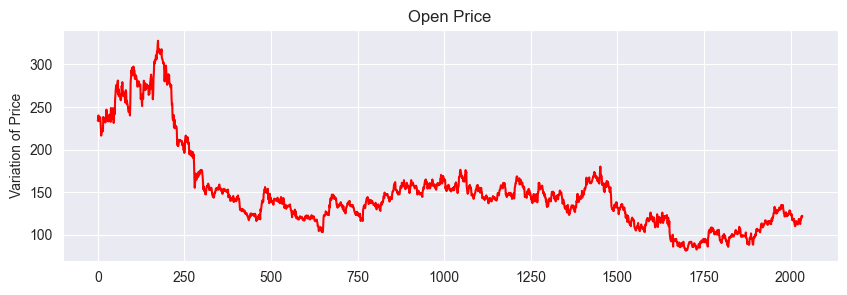

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
plt.plot(newdf.Open, color = 'r')
plt.ylabel('Variation of Price')
plt.title('Open Price')
plt.show()

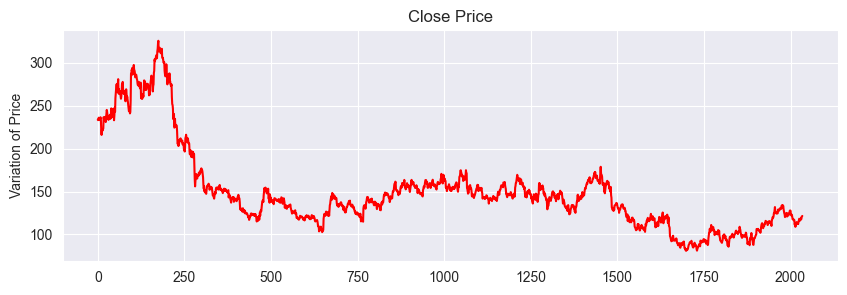

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
plt.plot(newdf.Close, color = 'r')
plt.ylabel('Variation of Price')
plt.title('Close Price')
plt.show()

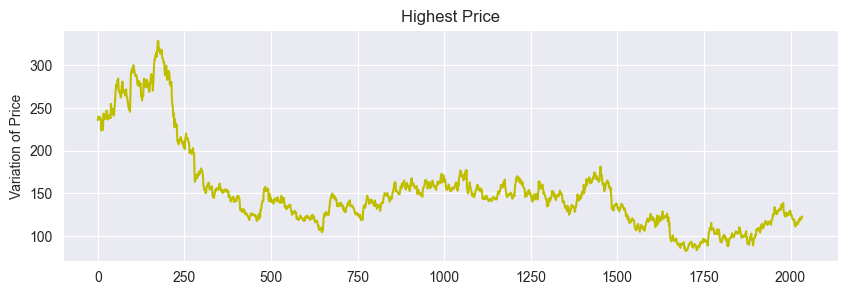

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
plt.plot(newdf.High, color = 'y')
plt.ylabel('Variation of Price')
plt.title('Highest Price')
plt.show()

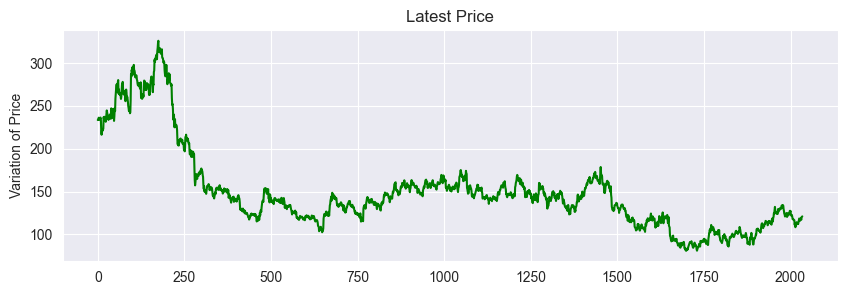

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
plt.plot(newdf.Last, color = 'g')
plt.ylabel('Variation of Price')
plt.title('Latest Price')
plt.show()

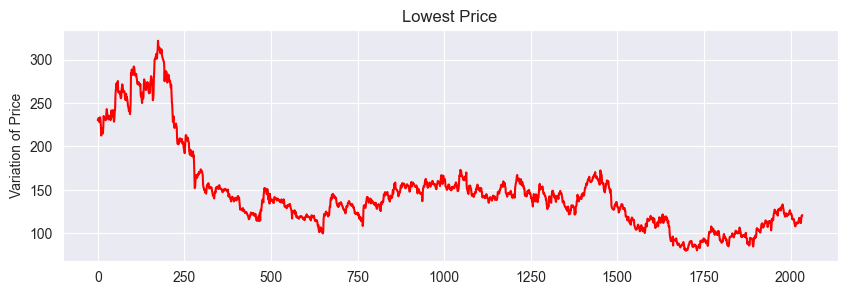

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
plt.plot(newdf.Low, color = 'r')
plt.ylabel('Variation of Price')
plt.title('Lowest Price')
plt.show()

#### __6. Modeling__

In [18]:
df_high = df.reset_index()['High']

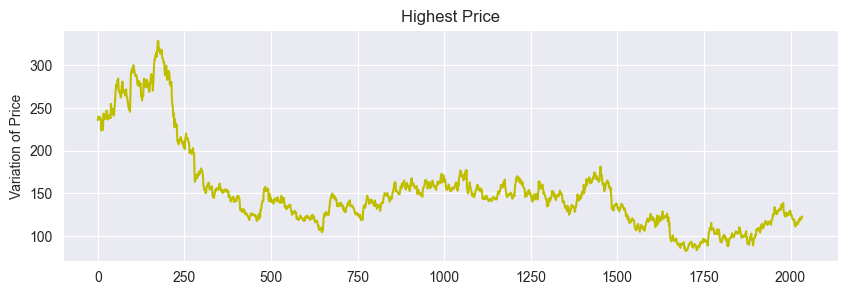

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,3))
plt.plot(df_high, color = 'y')
plt.ylabel('Variation of Price')
plt.title('Highest Price')
plt.show()

#### _Feature Scaling_

In [20]:
scaler = MinMaxScaler(feature_range= (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [21]:
df_high.shape

(2035, 1)

In [22]:
df_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

#### _Splitting The Data into Test & Train Sets_

In [23]:
train_set_size = int(len(df_high) * 0.75)
test_set_size = len(df_high) - train_set_size
train_data, test_data = df_high[0:train_set_size,:], df_high[train_set_size:len(df_high),:1]

In [24]:
train_set_size, test_set_size

(1526, 509)

In [25]:
def CreateDataset(dataset, time_step = 1):
    data_X, data_Y = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        data_X.append(a)
        data_Y.append(dataset[i+time_step,0])
    return np.array(data_X), np.array(data_Y)
        

In [26]:
time_step = 100
X_train, Y_train = CreateDataset(train_data, time_step)
X_test, Y_test = CreateDataset(test_data,time_step)

#### _Reshaping The Inputs_

In [27]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [28]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)

Shape of X_train:  (1425, 100, 1)
Shape of Y_train:  (1425,)


In [29]:
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_test:  (408, 100, 1)
Shape of Y_test:  (408,)


#### __7.   Creating LSTM Model__

In [45]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 6s 263ms/step - loss: 8.3649e-04 - val_loss: 8.6826e-04
Epoch 2/100
23/23 [==============================] - 6s 255ms/step - loss: 8.2154e-04 - val_loss: 8.6678e-04
Epoch 3/100
23/23 [==============================] - 8s 347ms/step - loss: 8.3427e-04 - val_loss: 8.5098e-04
Epoch 4/100
23/23 [==============================] - 8s 350ms/step - loss: 7.7158e-04 - val_loss: 9.3781e-04
Epoch 5/100
23/23 [==============================] - 6s 278ms/step - loss: 8.3704e-04 - val_loss: 9.8926e-04
Epoch 6/100
23/23 [==============================] - 7s 308ms/step - loss: 8.3504e-04 - val_loss: 8.1723e-04
Epoch 7/100
23/23 [==============================] - 8s 362ms/step - loss: 7.1805e-04 - val_loss: 8.7838e-04
Epoch 8/100
23/23 [==============================] - 9s 395ms/step - loss: 7.5351e-04 - val_loss: 9.5836e-04
Epoch 9/100
23/23 [==============================] - 9s 382ms/step - loss: 7.0319e-04 - val_loss: 7.7043e-04
Epoch 10/100
23/23 

#### __8. Driving Predictions From The Model__

In [50]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

13/13 [==============================] - 1s 63ms/step


In [51]:
#transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#### __9. Model Evaluation__

In [53]:
import math

In [54]:
math.sqrt(mean_squared_error(Y_train, train_predict))

167.7996191747809

#### __10. Plot The Result__

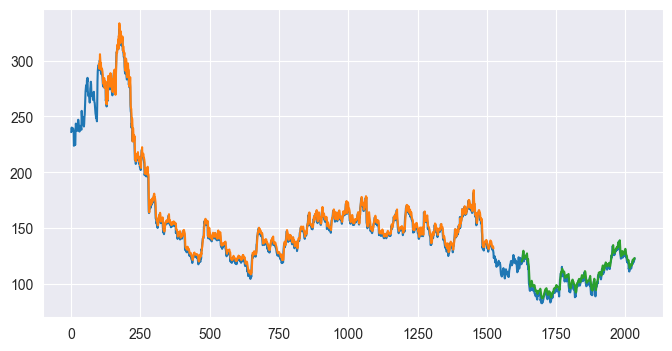

In [56]:
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df_high) - 1, :] = test_predict

plt.figure(figsize=(8,4))
plt.plot(scaler.inverse_transform(df_high))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#### __11. Predictions for The Next Month (30 Days)__

In [57]:
len(test_data), X_test.shape

(509, (408, 100, 1))

In [58]:
X_input = test_data[409:].reshape(1,-1)
X_input.shape

(1, 100)

In [59]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [62]:
list_output=[]
n_steps = 100
nextNumberOfDays = 30
i = 0

while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        X_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1,n_steps,1))
        yhat = model.predict(X_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        list_output.extend(yhat.tolist())
        i=i+1
        
    else:
        X_input = X_input.reshape((1,n_steps,1))
        yhat = model.predict(X_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        list_output.extend(yhat.tolist())
        i=i+1
        
print(list_output)

[0.1695379]
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433 0.13

In [64]:
new_day = np.arange(1,101)
predict_day = np.arange(101,131)

In [65]:
new_day.shape

(100,)

In [66]:
predict_day.shape

(30,)

In [67]:
new_data = df_high.tolist()
new_data.extend(list_output)

In [68]:
len(df_high)

2035

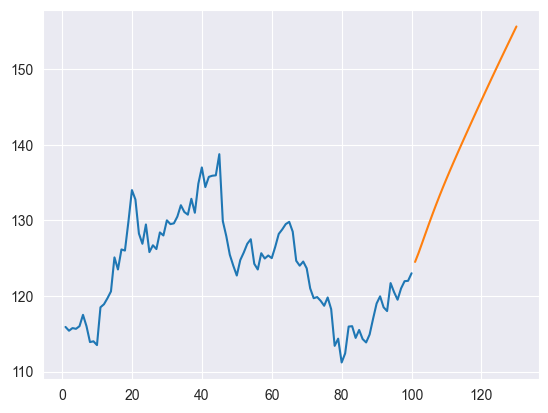

In [69]:
plt.plot(new_day, scaler.inverse_transform(df_high[1935:]))
plt.plot(predict_day, scaler.inverse_transform(list_output))

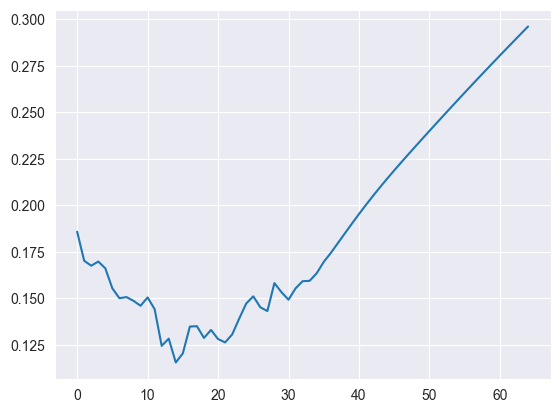

In [70]:
new_data = df_high.tolist()
new_data.extend(list_output)
plt.plot(new_data[2000:])